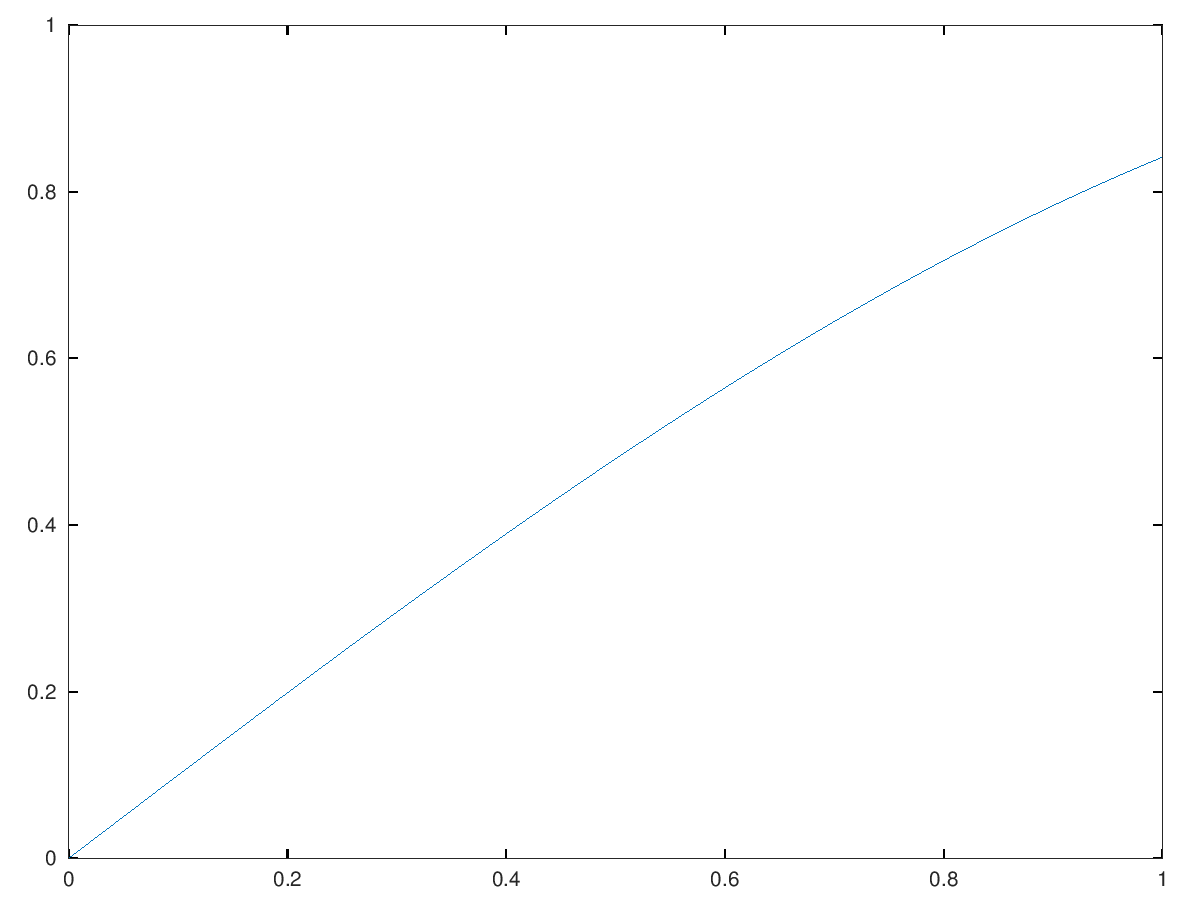

In [1]:
x = linspace(0,1,100);
u0 = sin(x);

plot(x,u0)